In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
data_path=r'/Users/Lilian/Downloads/Data Analytics Course/Data Analytics Immersion/Acheivement 6/Exercise 01/Data/'

In [3]:
airbnb = pd.read_csv(os.path.join(data_path,'airbnb-europe.csv'))

In [10]:
airbnb.shape

(41714, 19)

## Data Profile

In [11]:
airbnb.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Shared Room', 'Private Room',
       'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index'],
      dtype='object')

In [12]:
airbnb.describe()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,1.299459,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


In [13]:
airbnb.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [14]:
airbnb.isnull().sum()

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

#### no missing values are found

In [18]:
for col in airbnb.columns.tolist():
  weird = (airbnb[[col]].map(type) != airbnb[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (airbnb[weird]) > 0:
    print (col)

#### no duplicate records are found 

In [21]:
print(airbnb.dtypes)

City                            object
Price                          float64
Day                             object
Room Type                       object
Shared Room                       bool
Private Room                      bool
Person Capacity                float64
Superhost                         bool
Multiple Rooms                   int64
Business                         int64
Cleanliness Rating             float64
Guest Satisfaction             float64
Bedrooms                         int64
City Center (km)               float64
Metro Distance (km)            float64
Attraction Index               float64
Normalised Attraction Index    float64
Restraunt Index                float64
Normalised Restraunt Index     float64
dtype: object


### converting some data types

In [22]:
airbnb['Day'] = airbnb['Day'].astype(str)

In [23]:
airbnb['Room Type'] = airbnb['Room Type'].astype(str)
airbnb['City'] = airbnb['City'].astype(str)

## Quick visual analysis for better understanding of the data

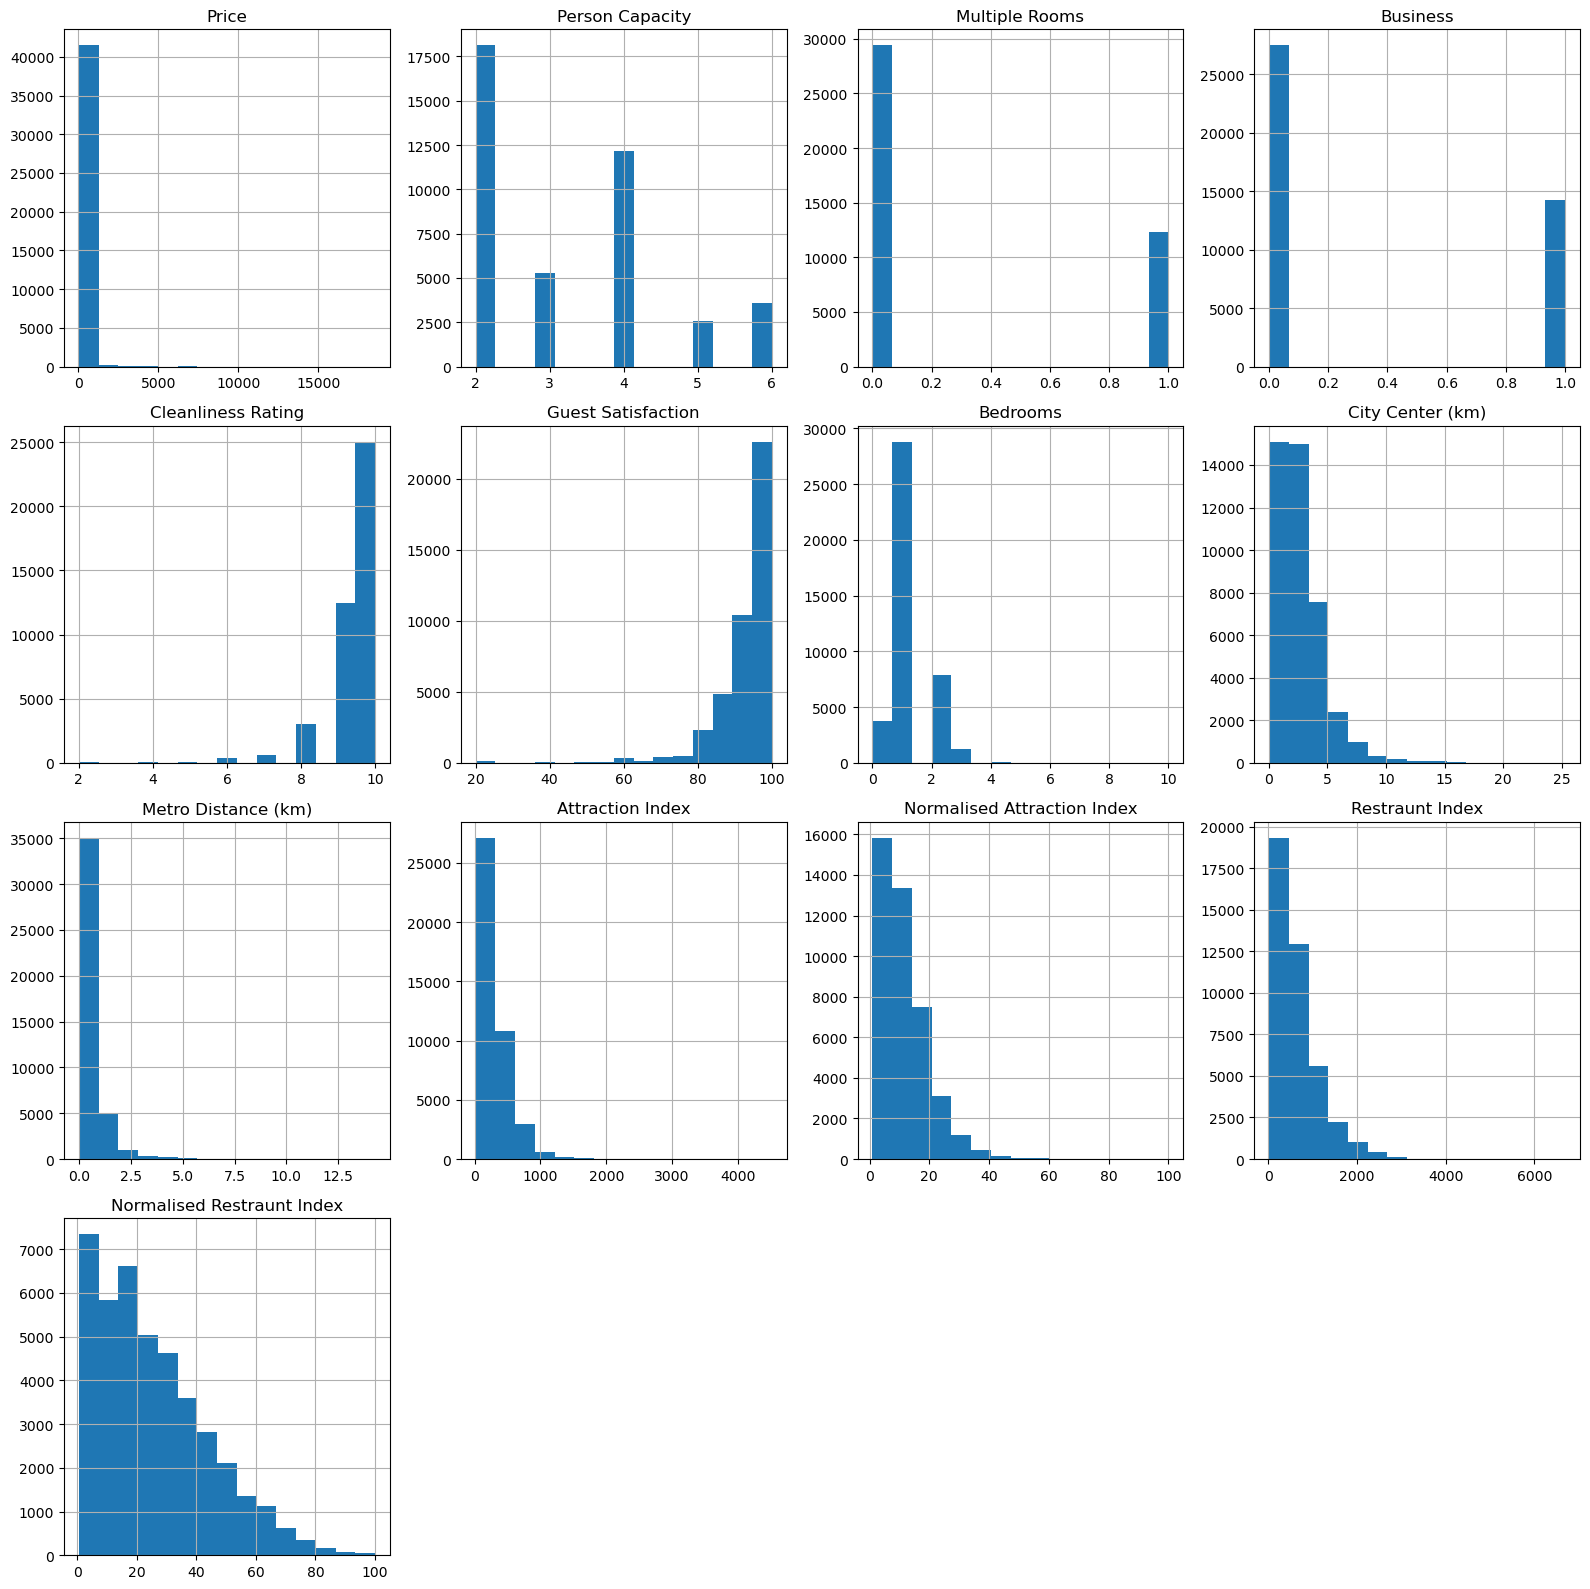

In [46]:
# historgram of numerical values 
airbnb.hist(bins=15, figsize=(16, 16))
plt.tight_layout()
plt.show()

### creating plot box for price column as there seem to be outliers.

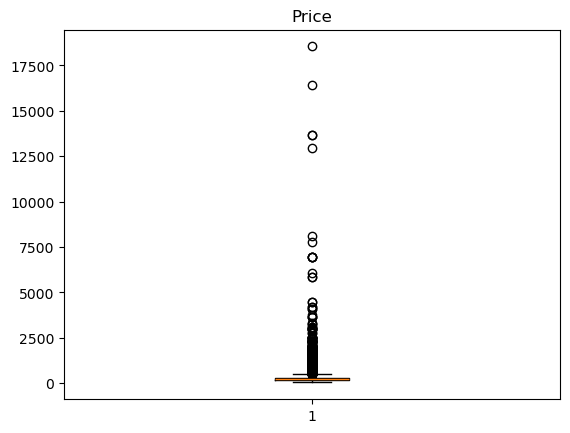

In [43]:
plt.boxplot(airbnb['Price'].dropna())
plt.title('Price')
plt.show()

<Axes: xlabel='City'>

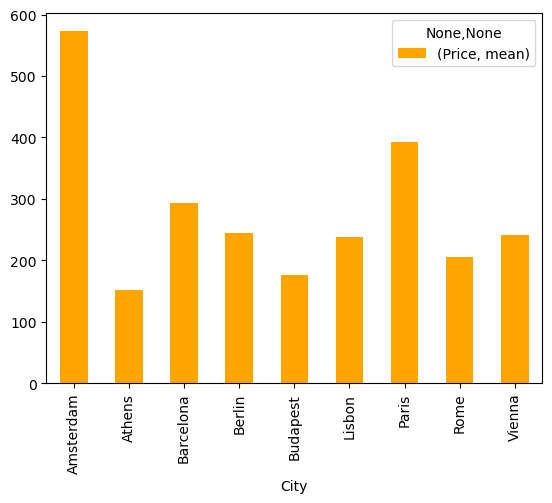

In [34]:
airbnb.groupby('City').agg({'Price': ['mean']}).plot.bar(color = 'orange')